In [202]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# Before import
df = pd.read_csv("flights_cleaned.csv")
df = df.drop(columns=['baseFare', 'segmentsDurationInSeconds'])
# Check if anything is blank
df.isnull().values.any()


False

In [203]:
df

,startingAirport,destinationAirport,totalFare,seatsRemaining,segmentsAirlineName,segmentsDistance
0,ATL,BOS,248.6,9,Delta,947
1,ATL,BOS,248.6,4,Delta,947
2,ATL,BOS,248.6,9,Delta,947
3,ATL,BOS,248.6,8,Delta,947
4,ATL,BOS,248.6,9,Delta,947
...,...,...,...,...,...,...
4056,ORD,LAX,361.6,6,American Airlines,1745
4057,ORD,LAX,361.6,9,United,1745
4058,ORD,LAX,361.6,9,United,1745
4059,ORD,LAX,361.6,5,United,1745


In [204]:
df['startingAirport'].value_counts()

LAX    410
LGA    396
BOS    346
ATL    340
ORD    337
DFW    324
JFK    296
CLT    280
EWR    276
MIA    264
DTW    218
DEN    215
IAD    140
SFO    139
PHL     72
OAK      8
Name: startingAirport, dtype: int64

In [205]:
# Remove data that contains small number of airport data
df = df[df["startingAirport"].str.contains("PHL")==False]
df = df[df["startingAirport"].str.contains("OAK")==False]
df = df[df["destinationAirport"].str.contains("PHL")==False]
df = df[df["destinationAirport"].str.contains("OAK")==False]
df

,startingAirport,destinationAirport,totalFare,seatsRemaining,segmentsAirlineName,segmentsDistance
0,ATL,BOS,248.6,9,Delta,947
1,ATL,BOS,248.6,4,Delta,947
2,ATL,BOS,248.6,9,Delta,947
3,ATL,BOS,248.6,8,Delta,947
4,ATL,BOS,248.6,9,Delta,947
...,...,...,...,...,...,...
4056,ORD,LAX,361.6,6,American Airlines,1745
4057,ORD,LAX,361.6,9,United,1745
4058,ORD,LAX,361.6,9,United,1745
4059,ORD,LAX,361.6,5,United,1745


In [206]:
print(df['segmentsAirlineName'].value_counts())

American Airlines    1244
Delta                 969
United                833
JetBlue Airways       708
Alaska Airlines        67
Frontier Airlines      30
Name: segmentsAirlineName, dtype: int64


In [207]:
# Remove data that contains small number of airport data
df = df[df["segmentsAirlineName"].str.contains("Alaska Airlines")==False]
df = df[df["segmentsAirlineName"].str.contains("Frontier Airlines")==False]
df

,startingAirport,destinationAirport,totalFare,seatsRemaining,segmentsAirlineName,segmentsDistance
0,ATL,BOS,248.6,9,Delta,947
1,ATL,BOS,248.6,4,Delta,947
2,ATL,BOS,248.6,9,Delta,947
3,ATL,BOS,248.6,8,Delta,947
4,ATL,BOS,248.6,9,Delta,947
...,...,...,...,...,...,...
4056,ORD,LAX,361.6,6,American Airlines,1745
4057,ORD,LAX,361.6,9,United,1745
4058,ORD,LAX,361.6,9,United,1745
4059,ORD,LAX,361.6,5,United,1745


In [208]:
# Rounds all flight travel distances to the nearest 50
mod = (df['segmentsDistance'] % 50)
df['roundedSegmentsDistance'] = df['segmentsDistance'] + np.where(mod>=25,50-mod,-mod)  
df['roundedSegmentsDistance']

0        950
1        950
2        950
3        950
4        950
        ... 
4056    1750
4057    1750
4058    1750
4059    1750
4060    1750
Name: roundedSegmentsDistance, Length: 3754, dtype: int64

In [209]:
# check how many times each distance occurs to make sure we have enough data to work with
df['roundedSegmentsDistance'].value_counts()

200     297
750     288
700     241
2450    237
550     237
1100    234
600     211
1400    204
850     161
500     160
2550    108
250     107
950     101
1250     99
1200     97
2600     88
1750     85
350      84
1600     83
650      61
800      55
900      49
1950     47
1450     41
1150     40
2350     37
1000     35
2100     34
2700     34
2300     32
1550     32
400      29
2000     26
1350     23
1850     21
1900     12
2150     12
1700     12
Name: roundedSegmentsDistance, dtype: int64

In [210]:
# Gets the mean total fare of each distance
distancepricingdf = df.groupby('roundedSegmentsDistance', as_index=False)['totalFare'].mean()
distancepricingdf

,roundedSegmentsDistance,totalFare
0,200,268.069865
1,250,298.731028
2,350,240.100000
3,400,229.531034
4,500,308.125000
5,550,360.346878
6,600,287.991232
7,650,305.051148
8,700,231.086017
9,750,253.833715


In [211]:
# for the life of me I could not figure out an easier way to do this. To overcome this hurdle I hardcoded this so I could progress.

# assign each distance with its average cost
# df.loc[df['roundedSegmentsDistance'] == 100,  'meanFareByDistance'] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 100].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 200,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 200].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 250,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 250].iloc[0][1]
# df.loc[df['roundedSegmentsDistance'] == 300,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 300].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 350,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 350].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 400,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 400].iloc[0][1]
# df.loc[df['roundedSegmentsDistance'] == 450,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 450].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 500,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 500].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 550,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 550].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 600,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 600].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 650,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 650].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 700,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 700].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 750,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 750].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 800,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 800].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 850,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 850].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 900,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 900].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 950,  'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 950].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1000, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1000].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1100, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1100].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1150, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1150].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1200, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1200].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1250, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1250].iloc[0][1]
# df.loc[df['roundedSegmentsDistance'] == 1300, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1300].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1350, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1350].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1400, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1400].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1450, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1450].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1550, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1550].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1600, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1600].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1700, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1700].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1750, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1750].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1850, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1850].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1900, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1900].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 1950, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 1950].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2000, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2000].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2100, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2100].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2150, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2150].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2300, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2300].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2350, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2350].iloc[0][1]
# df.loc[df['roundedSegmentsDistance'] == 2400, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2400].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2450, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2450].iloc[0][1]
# df.loc[df['roundedSegmentsDistance'] == 2500, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2500].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2550, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2550].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2600, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2600].iloc[0][1]
df.loc[df['roundedSegmentsDistance'] == 2700, 'meanFareByDistance' ] = distancepricingdf.loc[distancepricingdf['roundedSegmentsDistance'] == 2700].iloc[0][1]
df


,startingAirport,destinationAirport,totalFare,seatsRemaining,segmentsAirlineName,segmentsDistance,roundedSegmentsDistance,meanFareByDistance
0,ATL,BOS,248.6,9,Delta,947,950,386.689604
1,ATL,BOS,248.6,4,Delta,947,950,386.689604
2,ATL,BOS,248.6,9,Delta,947,950,386.689604
3,ATL,BOS,248.6,8,Delta,947,950,386.689604
4,ATL,BOS,248.6,9,Delta,947,950,386.689604
...,...,...,...,...,...,...,...,...
4056,ORD,LAX,361.6,6,American Airlines,1745,1750,377.529412
4057,ORD,LAX,361.6,9,United,1745,1750,377.529412
4058,ORD,LAX,361.6,9,United,1745,1750,377.529412
4059,ORD,LAX,361.6,5,United,1745,1750,377.529412


In [212]:
# 0 = below average price, 1 = above average price
df['fare_price_flag'] = df['totalFare'] > df['meanFareByDistance']
df['fare_price_flag'] = df['fare_price_flag'].astype(int)
df
df['fare_price_flag'].value_counts()

0    2238
1    1516
Name: fare_price_flag, dtype: int64

In [213]:
df

,startingAirport,destinationAirport,totalFare,seatsRemaining,segmentsAirlineName,segmentsDistance,roundedSegmentsDistance,meanFareByDistance,fare_price_flag
0,ATL,BOS,248.6,9,Delta,947,950,386.689604,0
1,ATL,BOS,248.6,4,Delta,947,950,386.689604,0
2,ATL,BOS,248.6,9,Delta,947,950,386.689604,0
3,ATL,BOS,248.6,8,Delta,947,950,386.689604,0
4,ATL,BOS,248.6,9,Delta,947,950,386.689604,0
...,...,...,...,...,...,...,...,...,...
4056,ORD,LAX,361.6,6,American Airlines,1745,1750,377.529412,0
4057,ORD,LAX,361.6,9,United,1745,1750,377.529412,0
4058,ORD,LAX,361.6,9,United,1745,1750,377.529412,0
4059,ORD,LAX,361.6,5,United,1745,1750,377.529412,0


In [214]:
dummies = pd.get_dummies(df.segmentsAirlineName)
df = pd.concat([df, dummies], axis='columns')
df

,startingAirport,destinationAirport,totalFare,seatsRemaining,segmentsAirlineName,segmentsDistance,roundedSegmentsDistance,meanFareByDistance,fare_price_flag,American Airlines,Delta,JetBlue Airways,United
0,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,1,0,0
1,ATL,BOS,248.6,4,Delta,947,950,386.689604,0,0,1,0,0
2,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,1,0,0
3,ATL,BOS,248.6,8,Delta,947,950,386.689604,0,0,1,0,0
4,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,ORD,LAX,361.6,6,American Airlines,1745,1750,377.529412,0,1,0,0,0
4057,ORD,LAX,361.6,9,United,1745,1750,377.529412,0,0,0,0,1
4058,ORD,LAX,361.6,9,United,1745,1750,377.529412,0,0,0,0,1
4059,ORD,LAX,361.6,5,United,1745,1750,377.529412,0,0,0,0,1


In [215]:
dummies = pd.get_dummies(df.startingAirport, prefix='start')
df = pd.concat([df, dummies], axis='columns')
df

,startingAirport,destinationAirport,totalFare,seatsRemaining,segmentsAirlineName,segmentsDistance,roundedSegmentsDistance,meanFareByDistance,fare_price_flag,American Airlines,...,start_DFW,start_DTW,start_EWR,start_IAD,start_JFK,start_LAX,start_LGA,start_MIA,start_ORD,start_SFO
0,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ATL,BOS,248.6,4,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ATL,BOS,248.6,8,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,ORD,LAX,361.6,6,American Airlines,1745,1750,377.529412,0,1,...,0,0,0,0,0,0,0,0,1,0
4057,ORD,LAX,361.6,9,United,1745,1750,377.529412,0,0,...,0,0,0,0,0,0,0,0,1,0
4058,ORD,LAX,361.6,9,United,1745,1750,377.529412,0,0,...,0,0,0,0,0,0,0,0,1,0
4059,ORD,LAX,361.6,5,United,1745,1750,377.529412,0,0,...,0,0,0,0,0,0,0,0,1,0


In [216]:
dummies = pd.get_dummies(df.destinationAirport, prefix='dest')
df = pd.concat([df, dummies], axis='columns')
df

,startingAirport,destinationAirport,totalFare,seatsRemaining,segmentsAirlineName,segmentsDistance,roundedSegmentsDistance,meanFareByDistance,fare_price_flag,American Airlines,...,dest_DFW,dest_DTW,dest_EWR,dest_IAD,dest_JFK,dest_LAX,dest_LGA,dest_MIA,dest_ORD,dest_SFO
0,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ATL,BOS,248.6,4,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ATL,BOS,248.6,8,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ATL,BOS,248.6,9,Delta,947,950,386.689604,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,ORD,LAX,361.6,6,American Airlines,1745,1750,377.529412,0,1,...,0,0,0,0,0,1,0,0,0,0
4057,ORD,LAX,361.6,9,United,1745,1750,377.529412,0,0,...,0,0,0,0,0,1,0,0,0,0
4058,ORD,LAX,361.6,9,United,1745,1750,377.529412,0,0,...,0,0,0,0,0,1,0,0,0,0
4059,ORD,LAX,361.6,5,United,1745,1750,377.529412,0,0,...,0,0,0,0,0,1,0,0,0,0


In [217]:
starts = ['start_LAX', 'dest_LGA','dest_BOS','dest_ATL','dest_ORD','dest_DFW','dest_JFK','dest_CLT','dest_EWR','dest_MIA','dest_DTW','dest_DEN','dest_IAD','dest_SFO']
dests = ['start_LAX', 'start_LGA','start_BOS','start_ATL','start_ORD','start_DFW','start_JFK','start_CLT','start_EWR','start_MIA','start_DTW','start_DEN','start_IAD','start_SFO']
airlines = ['American Airlines', 'Delta', 'JetBlue Airways','United']
# Predictors include starting airport, ending airport, airline name, seats remaining, and flight distance.
X = df[['seatsRemaining', 'segmentsDistance' ] + starts + dests + airlines]
# Make predictions on whether or not a flight's price is more than average for a flight of similar distance.
y = df['fare_price_flag']

# train with a .2 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Accuracy Score: 70.97%
True negative: 346
False positive 81
False negative 137
True positive 187


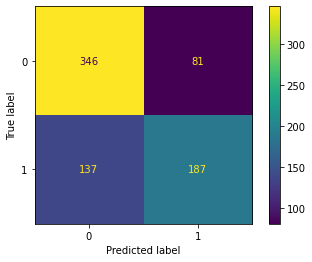

R2 Score: -0.18337814785902218


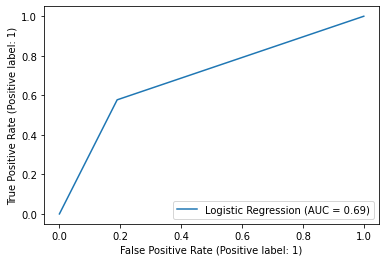

In [218]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

logmodel = LogisticRegression(max_iter=400)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

print('Accuracy Score: %5.2f%%' % (accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compare predictions with test results
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
# Formats the matrix output into variables
tn, fp, fn, tp = cnf_matrix.ravel() 
print("True negative: %d\nFalse positive %d\nFalse negative %d\nTrue positive %d" % (tn, fp, fn, tp))
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])

disp.plot()

plt.show()

print('R2 Score: %s' % (r2_score(y_test, y_pred)))


LR_disp = RocCurveDisplay.from_predictions(y_test, y_pred, name="Logistic Regression")





Accuracy Score: 74.83%
True negative: 348
False positive 79
False negative 110
True positive 214


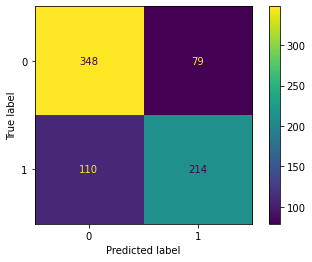

R2 Score: -0.025956284153005438


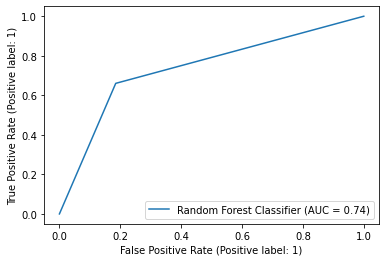

In [219]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Accuracy Score: %5.2f%%' % (accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compare predictions with test results
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
# Formats the matrix output into variables
tn, fp, fn, tp = cnf_matrix.ravel() 
print("True negative: %d\nFalse positive %d\nFalse negative %d\nTrue positive %d" % (tn, fp, fn, tp))
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])

disp.plot()

plt.show()

print('R2 Score: %s' % (r2_score(y_test, y_pred)))

RFC_disp = RocCurveDisplay.from_predictions(y_test, y_pred, name="Random Forest Classifier")



Accuracy Score: 77.76%
True negative: 359
False positive 68
False negative 99
True positive 225


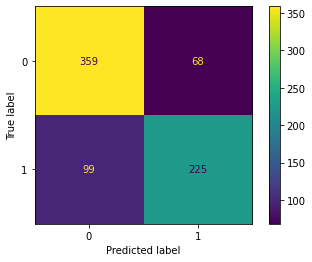

R2 Score: 0.09346719865845554


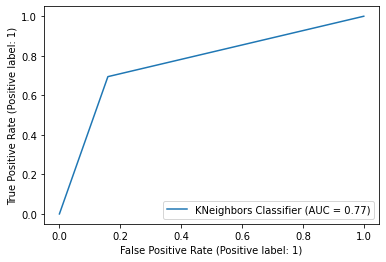

In [220]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train,y_train)
y_pred =  neigh.predict(X_test)
print('Accuracy Score: %5.2f%%' % (accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compare predictions with test results
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
# Formats the matrix output into variables
tn, fp, fn, tp = cnf_matrix.ravel() 
print("True negative: %d\nFalse positive %d\nFalse negative %d\nTrue positive %d" % (tn, fp, fn, tp))
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])

disp.plot()

plt.show()

print('R2 Score: %s' % (r2_score(y_test, y_pred)))

KNN_disp = RocCurveDisplay.from_predictions(y_test, y_pred, name="KNeighbors Classifier")



Accuracy Score: 86.02%
True negative: 385
False positive 42
False negative 63
True positive 261


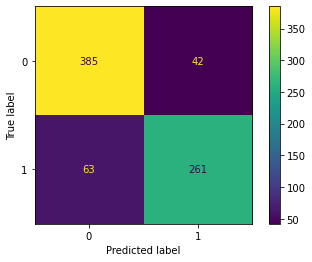

R2 Score: 0.4300242865816637


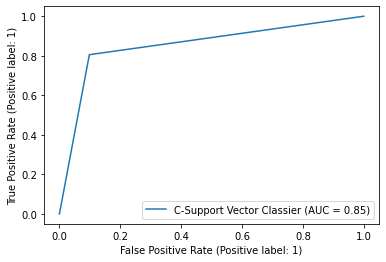

In [221]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(kernel='poly', gamma='auto', probability=True))
clf.fit(X_test,y_test)
y_pred = clf.predict(X_test)
print('Accuracy Score: %5.2f%%' % (accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compare predictions with test results
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
# Formats the matrix output into variables
tn, fp, fn, tp = cnf_matrix.ravel() 
print("True negative: %d\nFalse positive %d\nFalse negative %d\nTrue positive %d" % (tn, fp, fn, tp))
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])

disp.plot()

plt.show()

print('R2 Score: %s' % (r2_score(y_test, y_pred)))

SVC_disp = RocCurveDisplay.from_predictions(y_test, y_pred, name="C-Support Vector Classier")



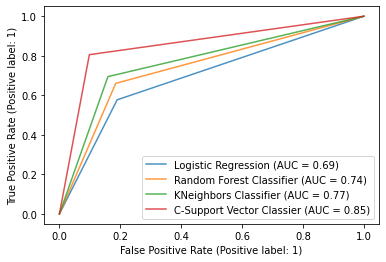

In [222]:
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()

LR_disp.plot(ax=ax, alpha=0.8)
RFC_disp.plot(ax=ax, alpha=0.8)
KNN_disp.plot(ax=ax, alpha=0.8)
SVC_disp.plot(ax=ax, alpha=0.8)
plt.show()